In [5]:
import functions as func
import numpy as np
from sklearn.cluster import DBSCAN


file_path = '0000.wav'  # 目标文件
print('分析文件', file_path)

# 读取音频文件
data, sr = func.read_audio_file(file_path)
print('读取音频文件', data.shape, sr)
sample_size = sr // 5
sample_number = len(data) // sample_size

# 切分为0.2s的小段
sample_list = data[:sample_size * sample_number].reshape((sample_number, sample_size))
print('切分', sample_list.shape)

# 取特征值
mfcc_data = np.array([func.get_mfcc(sample, sr, 32) for sample in sample_list])
print('取到特征值', mfcc_data.shape)

# t-sne降维
tsne_data = func.get_tsne(mfcc_data, 2)  # 降至2维
print('t-sne降维处理', tsne_data.shape)

# 计算结果存储为csv文件
func.save_csv_file(tsne_data, 'temp.csv')
print('保存完成')

分析文件 0000.wav
读取音频文件 (9600000,) 16000
切分 (3000, 3200)
取到特征值 (3000, 32, 18)
t-sne降维处理 (3000, 2)
保存完成


In [6]:
import functions as func
import numpy as np
from sklearn.cluster import DBSCAN


# 加载csv文件内容
tsne_data = func.read_csv_file('temp.csv')
print(tsne_data.shape)

# 读取音频文件
file_path = '0000.wav'  # 目标文件
data, sr = func.read_audio_file(file_path)
print('读取音频文件', data.shape, sr)
sample_size = sr // 5
sample_number = len(data) // sample_size

# 可交互式绘图
import plotly.graph_objs as go
import plotly as py

f = go.FigureWidget([go.Scatter(x=tsne_data[:, 0], y=tsne_data[:, 1], mode='markers')])
f.layout.hovermode = 'closest'  # 鼠标吸附到最近点

def click_callback(trace, points, selector):
    import functions
    index = points.point_inds[0]
    if 2 <= index <= sample_number - 2:
        start = (index - 2) * sample_size
        end = (index + 3) * sample_size
        play = data[start: end]
        func.play_audio(play, sr)  # 播放这一段音频数据
        
scatter = f.data[0]
scatter.on_click(click_callback)
f

(3000, 2)
读取音频文件 (9600000,) 16000


FigureWidget({
    'data': [{'mode': 'markers',
              'type': 'scatter',
              'uid': 'ded13af…

读取音频文件 (9600000,) 16000
DBSCAN聚类结果 {0, 1, 2, 3, -1}


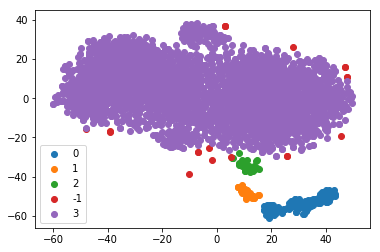

In [7]:
import functions as func
import numpy as np
from sklearn.cluster import DBSCAN


# 加载csv文件内容
tsne_data = func.read_csv_file('temp.csv')

# 读取音频文件
data, sr = func.read_audio_file(file_path)
print('读取音频文件', data.shape, sr)
sample_size = sr // 5
sample_number = len(data) // sample_size

# 聚类
estimator = DBSCAN(eps=4, min_samples=10)  # 参数
estimator.fit(tsne_data)  # 聚类
label_pred = estimator.labels_  # 获取聚类标签
print('DBSCAN聚类结果', set(label_pred))

# 绘图
func.show_2d_scatter(tsne_data, label_pred)

In [ ]:
"""这段还没整理"""


# 在时间线上标时聚类出来的异常音频段
point_list = np.arange(len(tsne_data))[np.where(label_pred == -1)]

time_point = np.zeros(shape=(len(tsne_data),), dtype=bool)
time_point[point_list] = True

analysis.show_1d_plot(time_point)


# 截取异常音频段 前0.2s+异常声音+后0.4s 如果两个异常之间间隔小于2s则合并为一段音频
# data, sr = analysis.read_audio_file(r'debug\{:04d}.wav'.format(index))  # 读取音频文件
data, sr = analysis.read_audio_file(r'output.wav'.format(index))  # 读取音频文件
sample_size = sr//5

index = 0
while index < len(point_list) - 1:
    point = point_list[index]
    next_point = point_list[index+1]

    start_point = (point - 1) * sample_size

    while next_point - point <= 10 and index < len(point_list) - 2:  # 间隔时间小于2s
        index += 1
        point = point_list[index]
        next_point = point_list[index + 1]

    end_point = (point + 1 + 2) * sample_size

    audio_data = data[start_point:end_point]
    analysis.save_audio_file(r'.\error_sound\out_{:04d}.wav'.format(point), audio_data, sr)
    index += 1
